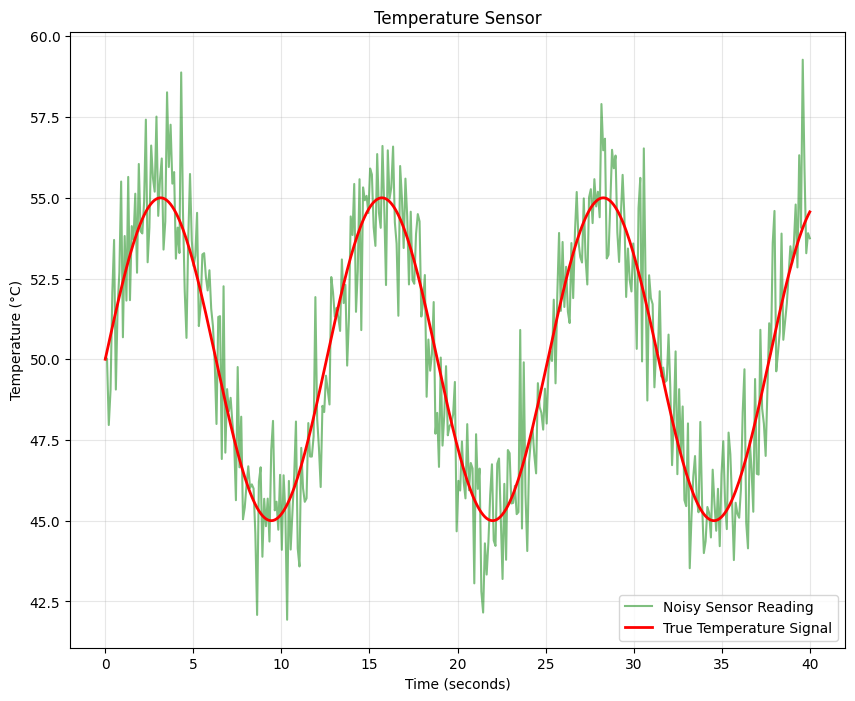

In [2]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from src.generator import generate_sensor_data
from src.visualize import plot_sensor_data

time,signal,reading = generate_sensor_data(duration = 40)

plot_sensor_data(time, signal, reading)

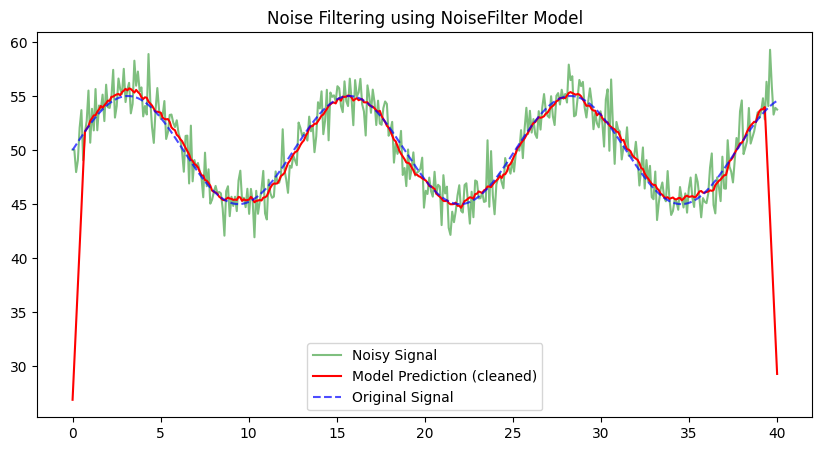

In [3]:
from src.model import NoiseFilter
import matplotlib.pyplot as plt

#1. Initialize the NoiseFilter
my_filter = NoiseFilter(window_size=15)

#2. Clean the noisy data we generated
cleaned_signal = my_filter.clean(reading)

#3. Visualise result
plt.figure(figsize = (10,5))
plt.plot(time, reading, label='Noisy Signal', color = 'green', alpha=0.5)
plt.plot(time, cleaned_signal, label='Model Prediction (cleaned)', color = 'red')
plt.plot(time, signal, label='Original Signal', color = 'blue', linestyle='dashed', alpha = 0.7)
plt.title('Noise Filtering using NoiseFilter Model')
plt.legend()
plt.show()

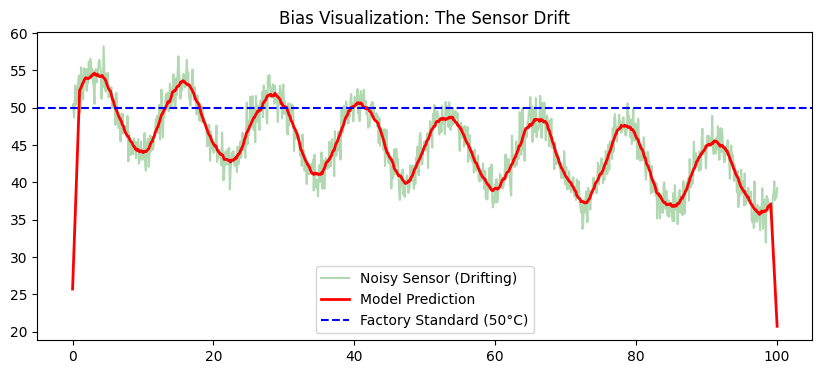

In [4]:
from src.generator import generate_sensor_data
from src.model import NoiseFilter
from src.visualize import plot_sensor_data
import matplotlib.pyplot as plt

# 1. Generate "Drifting" Data (The sensor is slowly dying)
time, true_signal, reading = generate_sensor_data(duration=100, bias_type='drift')

# 2. Apply the Filter
my_filter = NoiseFilter(window_size=20) # A strong filter
cleaned_data = my_filter.clean(reading)

# 3. Plot
plt.figure(figsize=(10, 4))
plt.plot(time, reading, label='Noisy Sensor (Drifting)', color='green', alpha=0.3)
plt.plot(time, cleaned_data, label='Model Prediction', color='red', linewidth=2)
# We draw a STRAIGHT line at 50 to show where the temp SHOULD be
plt.axhline(y=50, color='blue', linestyle='--', label='Factory Standard (50°C)')

plt.title("Bias Visualization: The Sensor Drift")
plt.legend()
plt.show()